In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

# Principal stress directions in FPS

The corresponding tensile stress at this position which must be perpendicular to the crack propagation
\begin{align}
\sigma^{\mathrm{tip},\psi}_1 = f_{\mathrm{t}}
\end{align}

\begin{align}
\sigma_{ij} =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{tip} \\
\tau^\mathrm{tip} & 0
\end{array}
\right]
\end{align}

\begin{align}
{\tilde{\sigma}^{\psi}_{ij}} =
\left[
\begin{array}{cc}
\mathrm{f_{ct}} & 0 \\
0 & x
\end{array}
\right]
\end{align}

<img src="fig/transformation.png" width="500"/>

As we know that the stress profile along the propagating crack is the transformation of the tip stress profile along the angle of propagation $\theta$, therefore, we can obtain the stress state at the crack tip by retracing back from the stress field of the propagating crack back to crack tip stress by inverting the transformation procedure as shown with the help of python code below:

In [2]:
f_ct = sp.Symbol(r'f_{ct}', nonnegative = True)
c_s = sp.Symbol(r'c_s', nonnegative = True)
s_s = sp.Symbol(r's_s', nonnegative = True)
sigma_x = sp.Symbol(r'\sigma_x', nonnegative = True)
tau_tip = sp.Symbol(r'\tau_{\mathrm{tip}}', nonnegative = True)
x = sp.Symbol(r'x', nonnegative = True)
psi = sp.Symbol(r'\psi', nonnegative = True)

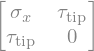

In [3]:
sigma_tip_ij = sp.Matrix([[sigma_x, tau_tip],
                       [tau_tip, 0]])
sigma_tip_ij

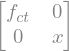

In [4]:
tilde_sigma_psi = sp.Matrix([[f_ct, 0],
                       [0, x]])
tilde_sigma_psi

## Transformation Matrix
\begin{align}
\mathrm{R}^{\psi}_{kl} =
\left[
\begin{array}{cc}
\cos \psi & - \sin \psi \\
\sin \psi & \cos \psi
\end{array}
\right]
\end{align}

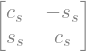

In [5]:
R_psi_kl = sp.Matrix([[c_s, -s_s],
                       [s_s, c_s]])
R_psi_kl

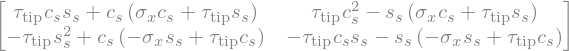

In [6]:
tilde_sigma_psi_ij = R_psi_kl.T * sigma_tip_ij * R_psi_kl
tilde_sigma_psi_ij

## Calculating $\sigma_x$

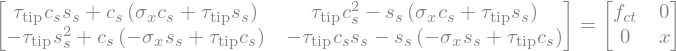

In [7]:
sp.Eq(tilde_sigma_psi_ij, tilde_sigma_psi)

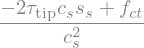

In [8]:
sigma_x_val = sp.solve(sp.Eq(tilde_sigma_psi_ij[0,0], tilde_sigma_psi[0,0]), sigma_x)
sigma_x_val[0]

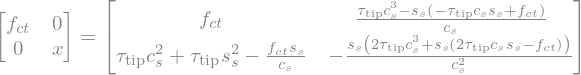

In [9]:
sp.simplify(sp.Eq(tilde_sigma_psi_ij.subs(sigma_x, sigma_x_val[0]), tilde_sigma_psi))

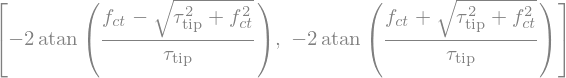

In [12]:
psi_val = sp.solve(sp.Eq(tilde_sigma_psi_ij.subs(sigma_x, sigma_x_val[0]).subs(c_s, sp.cos(psi)).subs(s_s, sp.sin(psi))[0,1]\
                                                                       , tilde_sigma_psi[0,1]), psi)
psi_val

In [13]:
f_ct_val = 3
get_psi_ = sp.lambdify((tau_tip), psi_val[0].subs(f_ct, f_ct_val), 'numpy')
get_psi_

<function _lambdifygenerated(Dummy_177)>

<string>:2: RuntimeWarning: invalid value encountered in true_divide


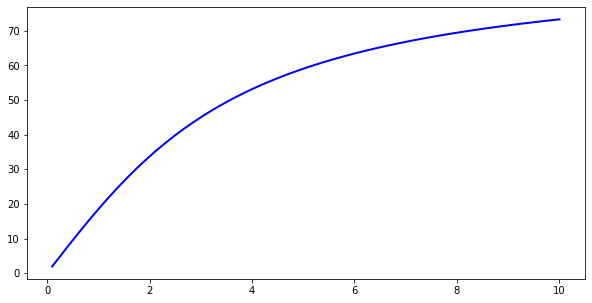

In [12]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
#f_ct_val = 3
tau_tip_ = np.linspace(0, 10, 100)
psi_val = get_psi_(tau_tip_)
ax1.plot(tau_tip_, psi_val/np.pi * 180, color='blue', lw=2);

## Calculating x

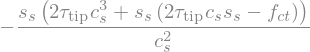

In [13]:
tilde_sigma_psi_jj = sp.simplify(tilde_sigma_psi_ij[1,1].subs(sigma_x, sigma_x_val[0]))
tilde_sigma_psi_jj

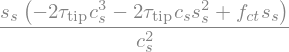

In [14]:
x_val = sp.solve(sp.Eq(tilde_sigma_psi_jj, tilde_sigma_psi[1,1]), x)
x_val[0]